In [87]:
import pandas as pd
final_df = pd.read_csv('../../data/dataset/combined_valeurs.csv')
final_df.head()                                                                                                                                                                                             

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003492,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003562,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003582,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003602,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right


In [50]:
final_df_160_2_r = final_df[(final_df['velocity'] == 210) & (final_df['experiment_number'] == 2) & (final_df['position'] == 'Right')]

final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
322,27/01/2005 11:47:17,300.343,0,1932,1,15,1,1,210.0,5.403011,...,0.003741,0.003761,0.003771,0.003791,0.003801,0.003811,0.003781,NaN,2,Right
323,27/01/2005 11:52:17,600.562,0,3554,1,15,1,1,210.0,5.403011,...,0.003801,0.003801,0.003771,0.003731,0.003731,0.003751,0.003761,NaN,2,Right
324,27/01/2005 11:57:18,901.359,0,5178,1,15,1,1,210.0,5.403011,...,0.003801,0.003781,0.003751,0.003731,0.003751,0.003761,0.003771,NaN,2,Right
325,27/01/2005 12:02:19,1202.328,0,6805,1,15,1,1,210.0,5.403011,...,0.003781,0.003791,0.003801,0.003811,0.003811,0.003801,0.003811,NaN,2,Right
326,27/01/2005 12:07:20,1502.828,0,8429,1,15,1,1,210.0,5.403011,...,0.003801,0.003821,0.003811,0.003801,0.003791,0.003801,0.003781,NaN,2,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,27/01/2005 21:38:15,35758.562,0,193513,1,15,1,1,210.0,5.403011,...,0.003911,0.003921,0.003901,0.003881,0.003851,0.003861,0.003871,NaN,2,Right
441,27/01/2005 21:43:16,36059.484,0,195141,1,15,1,1,210.0,5.403011,...,0.003921,0.003921,0.003931,0.003911,0.003911,0.003911,0.003891,NaN,2,Right
442,27/01/2005 21:48:17,36359.750,0,196765,1,15,1,1,210.0,5.403011,...,0.003901,0.003891,0.003871,0.003871,0.003881,0.003871,0.003901,NaN,2,Right
443,27/01/2005 21:53:17,36660.062,0,198386,1,15,1,1,210.0,5.403011,...,0.003901,0.003911,0.003921,0.003901,0.003881,0.003861,0.003881,NaN,2,Right


Displacement (Original): 0.00027935999999999976
Displacement (Smoothed): 0.00021151799999999995


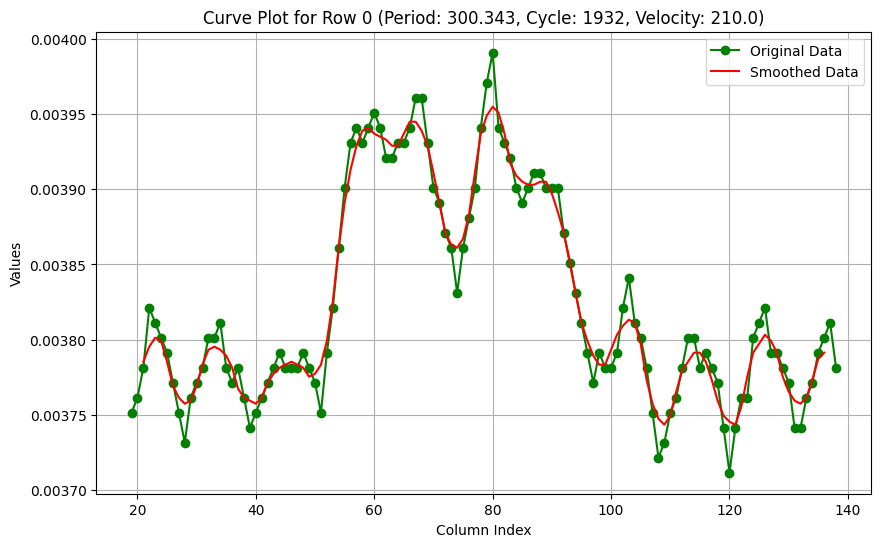

(0.00021151799999999995,
 19          NaN
 20          NaN
 21     0.003785
 22     0.003795
 23     0.003801
          ...   
 134    0.003773
 135    0.003787
 136    0.003791
 137         NaN
 138         NaN
 Name: 322, Length: 120, dtype: float64)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_row_curve_with_smoothing(df, row_index, window_size=5):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Select the values from column 19 to column 138 (inclusive) in the specified row
    data_to_plot = pd.to_numeric(df.iloc[row_index, 19:139], errors='coerce')

    # Apply rolling mean for smoothing
    smoothed_data = data_to_plot.rolling(window=window_size, center=True).mean()

    # Plot original and smoothed data
    plt.figure(figsize=(10, 6))
    plt.plot(range(19, 139), data_to_plot, label='Original Data', color='green', marker='o')
    plt.plot(range(19, 139), smoothed_data, label='Smoothed Data', color='red')

    # Get period, cycle number, and velocity for the specific row
    period = df.iloc[row_index, 1]
    cycle_number = df.iloc[row_index, 3]
    velocity = df.iloc[row_index, 8]

    # Calculate displacement for both original and smoothed data
    max_value = data_to_plot.max() if np.isfinite(data_to_plot.max()) else 0
    min_value = data_to_plot.min() if np.isfinite(data_to_plot.min()) else 0
    displacement_original = max_value - min_value

    max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
    min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0
    displacement_smoothed = max_value_smoothed - min_value_smoothed
    

    # Display calculated values on the plot
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Curve Plot for Row {row_index} (Period: {period}, Cycle: {cycle_number}, Velocity: {velocity})")
    plt.legend()
    plt.grid()

    # Print displacement information
    print(f"Displacement (Original): {displacement_original}")
    print(f"Displacement (Smoothed): {displacement_smoothed}")

    plt.show()
    return displacement_smoothed, smoothed_data
plot_row_curve_with_smoothing(final_df_160_2_r, 0, window_size=5)

In [74]:
import numpy as np
import pandas as pd

def calculate_first_smoothed_displacement(df, window_size=5):
    # Initialize a new column for smoothed displacement
    df['smoothed_displacement'] = np.nan
    
    for index in df.index:
        # Select the values from column 19 to column 138 (inclusive) in the current row
        data_to_smooth = pd.to_numeric(df.iloc[index, 19:139], errors='coerce')
        
        # Apply rolling mean for smoothing
        smoothed_data = data_to_smooth.rolling(window=window_size, center=True).mean()
        
        # Find the first non-NaN value in the smoothed data
        first_non_nan_value = smoothed_data[smoothed_data.notna()].iloc[0] if smoothed_data.notna().any() else np.nan
        
        # Store this value in the new column
        df.at[index, 'smoothed_displacement'] = first_non_nan_value
    
    return df

# Example usage:
# Calculate and add the smoothed displacement to the DataFrame
final_df = calculate_first_smoothed_displacement(final_df)

# Display the DataFrame to check the new column
print(final_df[['smoothed_displacement']])


      smoothed_displacement
0                  0.003552
1                  0.003558
2                  0.003564
3                  0.003566
4                  0.003580
...                     ...
5021               0.001536
5022               0.001557
5023               0.001538
5024               0.001555
5025               0.001540

[5026 rows x 1 columns]


In [53]:
final_df

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,133,134,135,136,137,138,139,experiment_number,position,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.003552
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.003558
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.003564
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.003566
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.003580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,29/06/2005 16:52:00,13521.859,0,140079,1,14,1,1,400.0,10.291450,...,0.001581,0.001561,0.001522,0.001522,0.001542,0.001571,NaN,7,Left,0.001536
5022,29/06/2005 16:57:00,13822.250,0,143168,1,14,1,1,400.0,10.291450,...,0.001522,0.001532,0.001601,0.001591,0.001542,0.001552,NaN,7,Left,0.001557
5023,29/06/2005 17:02:01,14123.312,0,146269,1,14,1,1,400.0,10.291450,...,0.001581,0.001561,0.001532,0.001522,0.001552,0.001542,NaN,7,Left,0.001538
5024,29/06/2005 17:07:02,14424.187,0,149363,1,14,1,1,400.0,10.291450,...,0.001571,0.001581,0.001561,0.001552,0.001522,0.001532,NaN,7,Left,0.001555


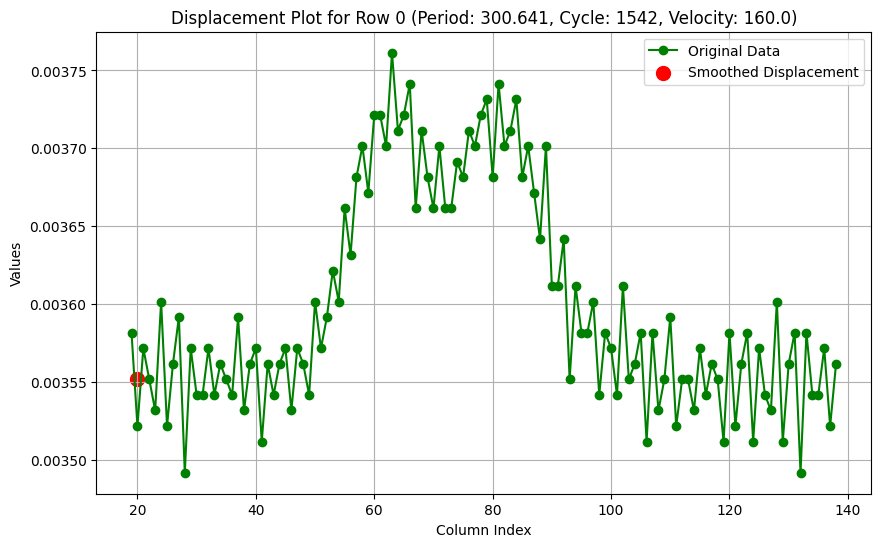

In [54]:
def plot_row_displacement_with_smoothed_point(df, row_index):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Extract original data for plotting
    original_data = pd.to_numeric(df.iloc[row_index, 19:139], errors='coerce')
    
    # Plot original data
    plt.figure(figsize=(10, 6))
    plt.plot(range(19, 139), original_data, label='Original Data', color='green', marker='o')

    # Get the single smoothed displacement value for this row
    smoothed_displacement = df.at[row_index, 'smoothed_displacement']
    
    # Plot the smoothed displacement as a single red point
    plt.scatter([20], [smoothed_displacement], color='red', label='Smoothed Displacement', s=100, marker='o')  # x=79 is roughly the midpoint
    
    # Get period, cycle number, and velocity for the specific row
    period = df.iloc[row_index, 1]
    cycle_number = df.iloc[row_index, 3]
    velocity = df.iloc[row_index, 8]

    # Display plot information
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Displacement Plot for Row {row_index} (Period: {period}, Cycle: {cycle_number}, Velocity: {velocity})")
    plt.legend()
    plt.grid()

    plt.show()

plot_row_displacement_with_smoothed_point(final_df, row_index=0)


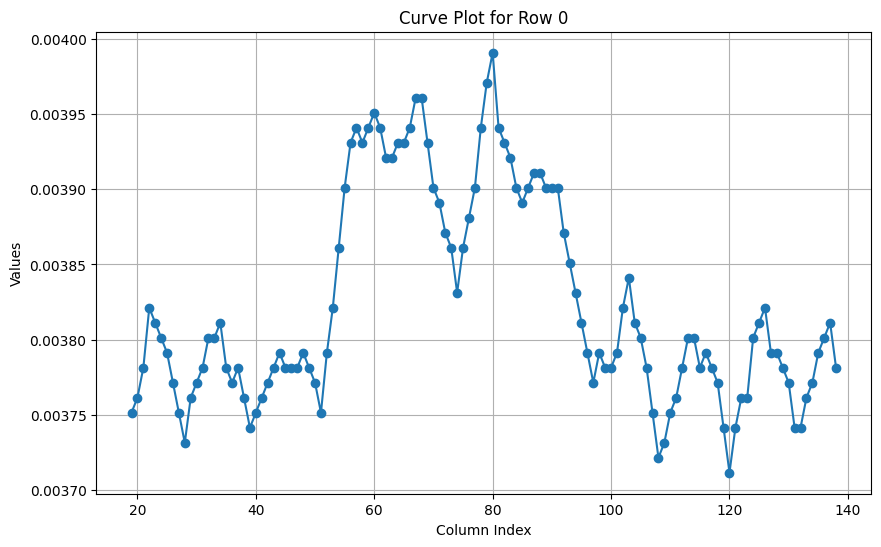

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_row_curve(df, row_index):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Select the values from column 19 to column 138 (inclusive) in the specified row
    y_values = df.iloc[row_index, 19:139].values
    
    # Generate x values as a range for plotting
    x_values = range(19, 139)
    
    # Plot the curve
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o')
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Curve Plot for Row {row_index}")
    plt.grid()
    plt.show()

# Example usage
plot_row_curve(final_df_160_2_r, 0)



In [56]:
final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
322,27/01/2005 11:47:17,300.343,0,1932,1,15,1,1,210.0,5.403011,...,0.003741,0.003761,0.003771,0.003791,0.003801,0.003811,0.003781,NaN,2,Right
323,27/01/2005 11:52:17,600.562,0,3554,1,15,1,1,210.0,5.403011,...,0.003801,0.003801,0.003771,0.003731,0.003731,0.003751,0.003761,NaN,2,Right
324,27/01/2005 11:57:18,901.359,0,5178,1,15,1,1,210.0,5.403011,...,0.003801,0.003781,0.003751,0.003731,0.003751,0.003761,0.003771,NaN,2,Right
325,27/01/2005 12:02:19,1202.328,0,6805,1,15,1,1,210.0,5.403011,...,0.003781,0.003791,0.003801,0.003811,0.003811,0.003801,0.003811,NaN,2,Right
326,27/01/2005 12:07:20,1502.828,0,8429,1,15,1,1,210.0,5.403011,...,0.003801,0.003821,0.003811,0.003801,0.003791,0.003801,0.003781,NaN,2,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,27/01/2005 21:38:15,35758.562,0,193513,1,15,1,1,210.0,5.403011,...,0.003911,0.003921,0.003901,0.003881,0.003851,0.003861,0.003871,NaN,2,Right
441,27/01/2005 21:43:16,36059.484,0,195141,1,15,1,1,210.0,5.403011,...,0.003921,0.003921,0.003931,0.003911,0.003911,0.003911,0.003891,NaN,2,Right
442,27/01/2005 21:48:17,36359.750,0,196765,1,15,1,1,210.0,5.403011,...,0.003901,0.003891,0.003871,0.003871,0.003881,0.003871,0.003901,NaN,2,Right
443,27/01/2005 21:53:17,36660.062,0,198386,1,15,1,1,210.0,5.403011,...,0.003901,0.003911,0.003921,0.003901,0.003881,0.003861,0.003881,NaN,2,Right


In [57]:
final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
322,27/01/2005 11:47:17,300.343,0,1932,1,15,1,1,210.0,5.403011,...,0.003741,0.003761,0.003771,0.003791,0.003801,0.003811,0.003781,NaN,2,Right
323,27/01/2005 11:52:17,600.562,0,3554,1,15,1,1,210.0,5.403011,...,0.003801,0.003801,0.003771,0.003731,0.003731,0.003751,0.003761,NaN,2,Right
324,27/01/2005 11:57:18,901.359,0,5178,1,15,1,1,210.0,5.403011,...,0.003801,0.003781,0.003751,0.003731,0.003751,0.003761,0.003771,NaN,2,Right
325,27/01/2005 12:02:19,1202.328,0,6805,1,15,1,1,210.0,5.403011,...,0.003781,0.003791,0.003801,0.003811,0.003811,0.003801,0.003811,NaN,2,Right
326,27/01/2005 12:07:20,1502.828,0,8429,1,15,1,1,210.0,5.403011,...,0.003801,0.003821,0.003811,0.003801,0.003791,0.003801,0.003781,NaN,2,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,27/01/2005 21:38:15,35758.562,0,193513,1,15,1,1,210.0,5.403011,...,0.003911,0.003921,0.003901,0.003881,0.003851,0.003861,0.003871,NaN,2,Right
441,27/01/2005 21:43:16,36059.484,0,195141,1,15,1,1,210.0,5.403011,...,0.003921,0.003921,0.003931,0.003911,0.003911,0.003911,0.003891,NaN,2,Right
442,27/01/2005 21:48:17,36359.750,0,196765,1,15,1,1,210.0,5.403011,...,0.003901,0.003891,0.003871,0.003871,0.003881,0.003871,0.003901,NaN,2,Right
443,27/01/2005 21:53:17,36660.062,0,198386,1,15,1,1,210.0,5.403011,...,0.003901,0.003911,0.003921,0.003901,0.003881,0.003861,0.003881,NaN,2,Right


C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2758315145.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference'] = df[column_name] - first_value
C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2758315145.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2758315145.py:43: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

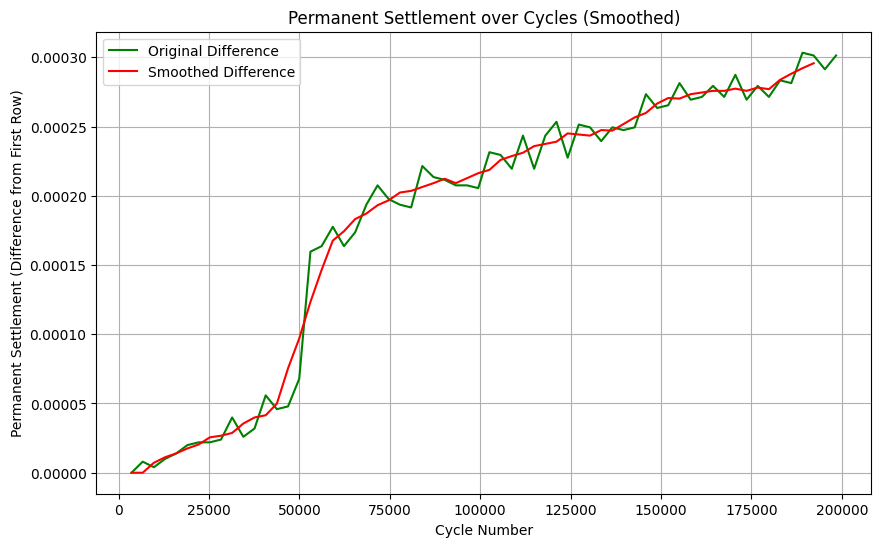

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

def add_difference_from_first_row(df, column_name):
    """
    Calculates the difference between each row value in the specified column and the first row's value,
    and adds a new column to the DataFrame with these differences.
    """
    first_value = df[column_name].iloc[0]
    df['Difference'] = df[column_name] - first_value
    return df

def add_smoothed_difference_column(df, window_size=5):
    """
    Calculates the rolling mean of the 'Difference' column and adds it as a new column.
    """
    df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
    return df

def plot_difference_with_smoothing(df):
    """
    Plots both the original 'Difference' and 'Smoothed_Difference' columns against Cycle_Number.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['Cycle_Number'], df['Difference'], marker='', label='Original Difference', color='green')
    plt.plot(df['Cycle_Number'], df['Smoothed_Difference'], marker='', label='Smoothed Difference', color='red')
    plt.xlabel("Cycle Number")
    plt.ylabel("Permanent Settlement (Difference from First Row)")
    plt.title("Permanent Settlement over Cycles (Smoothed)")
    plt.legend()
    plt.grid()
    plt.show()

final_df_160_2_r = final_df[(final_df['velocity'] == 400) & (final_df['experiment_number'] == 6) & (final_df['position'] == 'Right')]

# Applying the difference calculation to the final_df_160_2_r dataset
final_df_160_2_r = add_difference_from_first_row(final_df_160_2_r, 'smoothed_displacement')

# Adding smoothed difference column
final_df_160_2_r = add_smoothed_difference_column(final_df_160_2_r, window_size=5)

# Plotting the original and smoothed difference colums
final_df_160_2_r['Smoothed_Difference'].iloc[0] = 0
final_df_160_2_r['Smoothed_Difference'].iloc[1] = 0
plot_difference_with_smoothing(final_df_160_2_r)


In [59]:
# final_df_160_2_r['Smoothed_Difference'].iloc[0] = 0
final_df_160_2_r

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference,Smoothed_Difference
3574,17/06/2005 09:55:11,300.235,0,3583,1,15,1,1,400.0,10.29145,...,0.007942,0.007912,0.007922,0.007952,NaN,6,Right,0.007972,0.000000,0.000000
3575,17/06/2005 10:00:11,600.781,0,6680,1,15,1,1,400.0,10.29145,...,0.007982,0.007952,0.007892,0.007922,NaN,6,Right,0.007980,0.000008,0.000000
3576,17/06/2005 10:05:12,901.031,0,9768,1,15,1,1,400.0,10.29145,...,0.007942,0.007942,0.007952,0.007922,NaN,6,Right,0.007976,0.000004,0.000007
3577,17/06/2005 10:10:12,1201.438,0,12862,1,15,1,1,400.0,10.29145,...,0.007942,0.007892,0.007942,0.008012,NaN,6,Right,0.007982,0.000010,0.000011
3578,17/06/2005 10:15:13,1501.875,0,15951,1,15,1,1,400.0,10.29145,...,0.007902,0.007952,0.007982,0.007972,NaN,6,Right,0.007986,0.000014,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,17/06/2005 14:50:37,18026.422,0,186014,1,15,1,1,400.0,10.29145,...,0.008211,0.008271,0.008241,0.008201,NaN,6,Right,0.008253,0.000281,0.000288
3634,17/06/2005 14:55:38,18327.266,0,189109,1,15,1,1,400.0,10.29145,...,0.008211,0.008251,0.008261,0.008241,NaN,6,Right,0.008275,0.000303,0.000292
3635,17/06/2005 15:00:39,18627.875,0,192201,1,15,1,1,400.0,10.29145,...,0.008201,0.008251,0.008271,0.008231,NaN,6,Right,0.008273,0.000301,0.000296
3636,17/06/2005 15:05:39,18928.281,0,195295,1,15,1,1,400.0,10.29145,...,0.008251,0.008241,0.008181,0.008241,NaN,6,Right,0.008263,0.000291,NaN


In [60]:
# lezem l khat l a7mar yo2ta3 bl zero

Displacement (Original): 0.00027935999999999976
Displacement (Smoothed): 0.00021151799999999995


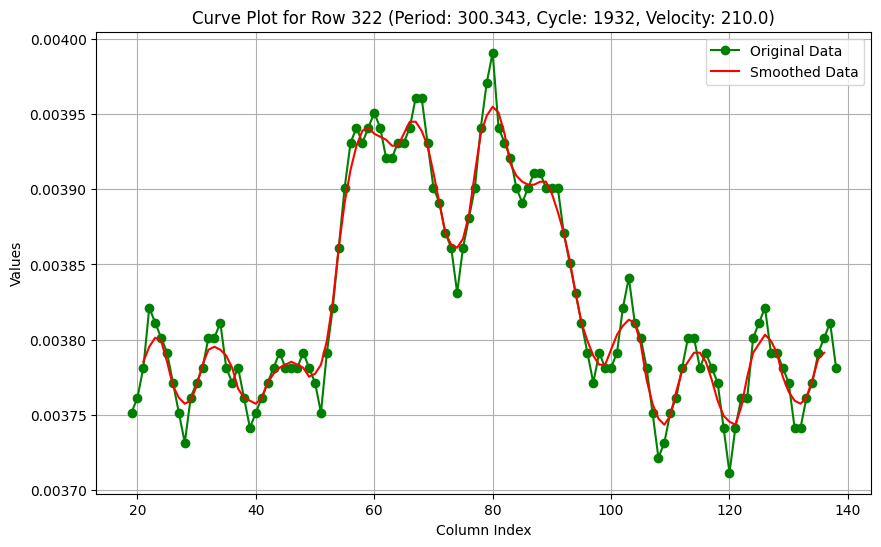

(0.00021151799999999995,
 19          NaN
 20          NaN
 21     0.003785
 22     0.003795
 23     0.003801
          ...   
 134    0.003773
 135    0.003787
 136    0.003791
 137         NaN
 138         NaN
 Name: 322, Length: 120, dtype: float64)

In [61]:
plot_row_curve_with_smoothing(final_df, 322, window_size=5)

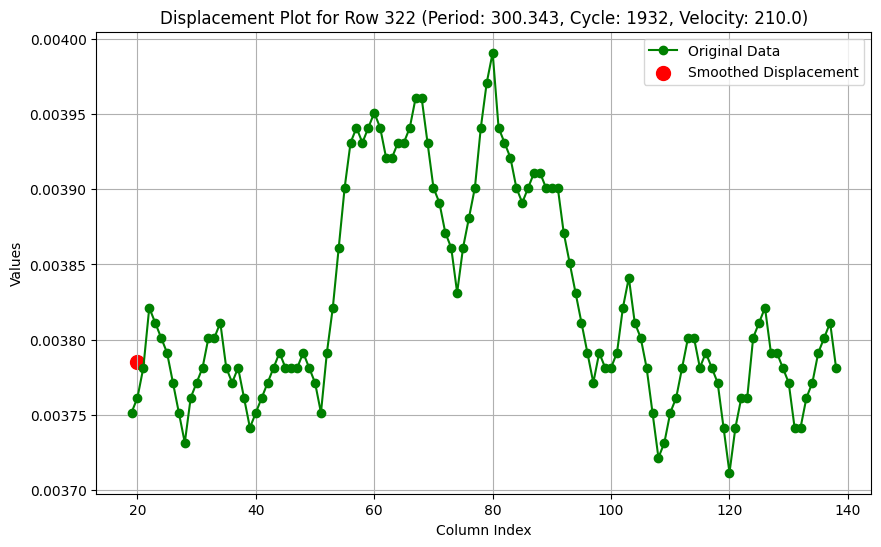

In [62]:
plot_row_displacement_with_smoothed_point(final_df, row_index=322)


In [260]:
import pandas as pd
import numpy as np

final_df = pd.read_csv('../../data/dataset/combined_valeurs.csv')


def calculate_first_smoothed_displacement(df, window_size=5):
    # Initialize a new column for smoothed displacement
    df['smoothed_displacement'] = np.nan
    
    for index in df.index:
        # Select the values from column 19 to column 138 (inclusive) in the current row
        data_to_smooth = pd.to_numeric(df.iloc[index, 19:139], errors='coerce')
        
        # Apply rolling mean for smoothing
        smoothed_data = data_to_smooth.rolling(window=window_size, center=True).mean()
        
        # Find the first non-NaN value in the smoothed data
        first_non_nan_value = smoothed_data[smoothed_data.notna()].iloc[0] if smoothed_data.notna().any() else np.nan
        
        # Store this value in the new column
        df.at[index, 'smoothed_displacement'] = first_non_nan_value
    
    return df

# Example usage:
# Calculate and add the smoothed displacement to the DataFrame
final_df = calculate_first_smoothed_displacement(final_df)


def add_segmented_differences(df):
    """
    Calculates the difference between each row's 'smoothed_displacement' and the 
    first value within each segment where 'velocity' and 'position' are consistent.
    """
    # Initialize the 'Difference' column
    df['Difference'] = 0.0
    
    # Variables to track the starting value for each segment
    reference_value = None
    current_velocity = None
    current_position = None

    for i in range(len(df)):
        row = df.iloc[i]
        
        # Check if the velocity or position has changed
        if row['velocity'] != current_velocity or row['position'] != current_position:
            # Reset the reference value for a new segment
            reference_value = row['smoothed_displacement']
            current_velocity = row['velocity']
            current_position = row['position']
        
        # Calculate the difference from the reference value
        df.at[i, 'Difference'] = row['smoothed_displacement'] - reference_value
    
    return df

# Applying the segmented difference calculation to the DataFrame
final_df = add_segmented_differences(final_df)



In [261]:
def calculate_first_smoothed_displacement(df, window_size=5):
    # Initialize a new column for smoothed displacement
    df['smoothed_displacement'] = np.nan
    
    for index in df.index:
        # Select the values from column 19 to column 138 (inclusive) in the current row
        data_to_smooth = pd.to_numeric(df.iloc[index, 19:139], errors='coerce')
        
        # Apply rolling mean for smoothing
        smoothed_data = data_to_smooth.rolling(window=window_size, center=True).mean()
        
        # Find the first non-NaN value in the smoothed data
        first_non_nan_value = smoothed_data[smoothed_data.notna()].iloc[0] if smoothed_data.notna().any() else np.nan
        
        # Store this value in the new column
        df.at[index, 'smoothed_displacement'] = first_non_nan_value
    
    return df

def smooth_difference(df, window_size=5):
    # Apply a rolling mean to smooth the 'Difference' column
    df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
    
    # Set the first few values to match the original 'Difference' values
    if len(df) > window_size:
        df['Smoothed_Difference'].iloc[:window_size] = df['Difference'].iloc[:window_size]
        # Set the last few values to match the original 'Difference' values
        df['Smoothed_Difference'].iloc[-window_size:] = df['Difference'].iloc[-window_size:]    
    return df

# Example usage:
# Calculate and add the smoothed displacement to the DataFrame
final_df = calculate_first_smoothed_displacement(final_df)
final_df['position'] = final_df['position'].replace({'Right': 0, 'Left': 1})
final_df.drop(columns=['Date'], inplace=True)

# Average displacement for each experiment
unique_values_col4 = final_df['experiment_number'].unique()

# Creating separate DataFrames for each experiment and storing them in a dictionary
experiment_tables = {exp_num: final_df[final_df['experiment_number'] == exp_num] for exp_num in unique_values_col4}

table_2 = experiment_tables[2]
table_3 = experiment_tables[3]
table_6 = experiment_tables[6]
table_7 = experiment_tables[7]

table_2['id'] = range(len(table_2))
table_3['id'] = range(len(table_3))
table_6['id'] = range(len(table_6))
table_7['id'] = range(len(table_7))

combined_df = pd.concat([table_2, table_3, table_6, table_7])

final_df = combined_df.groupby(['id', 'velocity']).mean().reset_index()





C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2445661390.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df['position'] = final_df['position'].replace({'Right': 0, 'Left': 1})
C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2445661390.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2['id'] = range(len(table_2))
C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2445661390.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [262]:
final_df

,id,velocity,Period,2,Cycle_Number,4,5,6,7,9,...,134,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference
0,0,160.0000,300.6565,0.0000,1772.2500,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0028,0.0028,0.0028,0.0028,0.0028,NaN,4.5000,0.0000,0.0028,0.0000
1,1,160.0000,601.1132,0.0000,3009.7500,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0028,0.0029,0.0028,0.0029,0.0029,NaN,4.5000,0.0000,0.0028,0.0000
2,2,160.0000,901.6522,0.0000,4246.7500,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0028,0.0029,0.0029,0.0029,0.0029,NaN,4.5000,0.0000,0.0029,0.0000
3,3,160.0000,1202.1408,0.0000,5483.5000,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0029,0.0029,0.0029,0.0029,0.0029,NaN,4.5000,0.0000,0.0029,0.0000
4,4,160.0000,1502.7577,0.0000,6721.0000,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0029,0.0029,0.0029,0.0029,0.0029,NaN,4.5000,0.0000,0.0029,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1319,400.0000,15774.1405,0.0000,163046.5000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0031,0.0031,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016
1450,1320,400.0000,16074.7580,0.0000,166138.5000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0031,0.0032,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016
1451,1321,400.0000,16375.5935,0.0000,169235.0000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0031,0.0031,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016
1452,1322,400.0000,16676.2340,0.0000,172329.0000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0031,0.0031,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016


In [263]:
import pandas as pd

# Function to create separate DataFrames based on unique combinations of velocity and position
def create_tables_by_velocity_position(df):
    tables = {}
    unique_velocities = df['velocity'].unique()
    unique_positions = df['position'].unique()

    print(unique_velocities)
    print(unique_positions)
    
    for velocity in unique_velocities:
        for position in unique_positions:
            # Filter the DataFrame based on the current combination of velocity and position
            filtered_df = df[(df['velocity'] == int(velocity)) & (df['position'] == int(position))]
            
            # Create a dynamic name for the DataFrame based on velocity and position
            table_name = f"df_{int(velocity)}_{int(position)}"
            tables[table_name] = filtered_df
    
    return tables

# Example usage
tables_dict = create_tables_by_velocity_position(final_df)

[160. 210. 270. 320. 360. 380. 400.]
[0.  1.  0.5]


In [264]:
import pandas as pd

# Assuming smooth_difference is already defined
def smooth_difference(df, window_size=5):
    df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
    # Set the first and last values as per previous conditions
    if len(df) > 1:
        df['Smoothed_Difference'].iloc[:window_size] = df['Difference'].iloc[:window_size]
        df['Smoothed_Difference'].iloc[-window_size:] = df['Difference'].iloc[-window_size:]
    return df

# Apply smoothing to each table in tables_dict and store results
for table_name, table_df in tables_dict.items():
    # Apply the smoothing function
    tables_dict[table_name] = smooth_difference(table_df)

# Combine all tables back into a single DataFrame based on 'id'
combined_df = pd.concat(tables_dict.values(), ignore_index=True)

# Sort the combined DataFrame by 'id' to maintain order if needed
combined_df = combined_df.sort_values(by='id').reset_index(drop=True)

combined_df


C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2477752938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoothed_Difference'] = df['Difference'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_29792\2477752938.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like

,id,velocity,Period,2,Cycle_Number,4,5,6,7,9,...,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference,Smoothed_Difference
0,0,160.0000,300.6565,0.0000,1772.2500,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0028,0.0028,0.0028,0.0028,NaN,4.5000,0.0000,0.0028,0.0000,0.0000
1,1,160.0000,601.1132,0.0000,3009.7500,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0029,0.0028,0.0029,0.0029,NaN,4.5000,0.0000,0.0028,0.0000,0.0000
2,2,160.0000,901.6522,0.0000,4246.7500,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0029,0.0029,0.0029,0.0029,NaN,4.5000,0.0000,0.0029,0.0000,0.0000
3,3,160.0000,1202.1408,0.0000,5483.5000,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0029,0.0029,0.0029,0.0029,NaN,4.5000,0.0000,0.0029,0.0000,0.0000
4,4,160.0000,1502.7577,0.0000,6721.0000,1.0000,15.0000,1.0000,1.0000,4.1166,...,0.0029,0.0029,0.0029,0.0029,NaN,4.5000,0.0000,0.0029,0.0001,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1319,400.0000,15774.1405,0.0000,163046.5000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0031,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016,0.0016
1449,1320,400.0000,16074.7580,0.0000,166138.5000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0032,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016,0.0016
1450,1321,400.0000,16375.5935,0.0000,169235.0000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0031,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016,0.0016
1451,1322,400.0000,16676.2340,0.0000,172329.0000,1.0000,14.0000,1.0000,1.0000,10.2914,...,0.0031,0.0031,0.0031,0.0031,NaN,6.5000,1.0000,0.0031,0.0016,0.0016


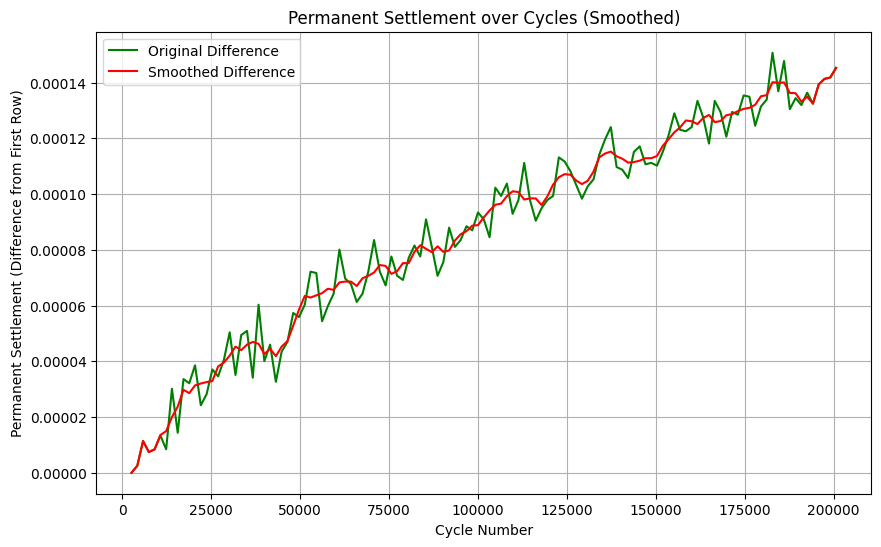

In [265]:
# Filter the DataFrame based on position and velocity, and plot
df = combined_df[(combined_df['position'] == 1) & (combined_df['velocity'] == 210)]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['Difference'], label='Original Difference', color='green')
plt.plot(df['Cycle_Number'], df['Smoothed_Difference'], label='Smoothed Difference', color='red')
plt.xlabel("Cycle Number")
plt.ylabel("Permanent Settlement (Difference from First Row)")
plt.title("Permanent Settlement over Cycles (Smoothed)")
plt.legend()
plt.grid()
plt.show()

In [281]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

X = combined_df[['velocity', 'Cycle_Number']]
y = combined_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 150, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 4, 6, 8, 16],
    'max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))
mean_val_score = np.mean(val_scores)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
642 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\

Best Model Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Validation Score (cross-validated): 0.9991
Test Score: 0.9994


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import lightgbm as lgb
import numpy as np

# Define features and target
X = combined_df[['velocity', 'Cycle_Number']]
y = combined_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the LightGBM model and hyperparameters to tune
model = lgb.LGBMRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 10, -1],  # -1 means no limit for max_depth
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model_lgb = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model_lgb, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model_lgb.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model_lgb.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 929, number of used features: 2
[LightGBM] [Info] Start training from score 0.001003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [287]:
from sklearn.metrics import r2_score

y_pred_val = best_model_lgb.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model_lgb.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')

R2 Score on Validation Set: 0.5145
R2 Score on Test Set: 0.5410


In [277]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RepeatedKFold

# Define features and target
X = combined_df[['velocity', 'Cycle_Number']]
y = combined_df['Smoothed_Difference']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the XGBoost model and hyperparameters to tune
best_model_xgb = xgb.XGBRegressor(random_state=42, n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model_xgb, X_val, y_val, cv=cv, scoring=make_scorer(custom_scorer))
mean_val_score = np.mean(val_scores)

print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model_xgb.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model_xgb.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")




Validation Score (cross-validated): 0.9988
Test Score: 0.9989


In [ ]:
from sklearn.metrics import r2_score

y_pred_val = best_model_xgb.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model_xgb.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')

R2 Score on Validation Set: 0.6147
R2 Score on Test Set: 0.3865


# Score

In [282]:
from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')


R2 Score on Validation Set: 0.6339
R2 Score on Test Set: 0.5327


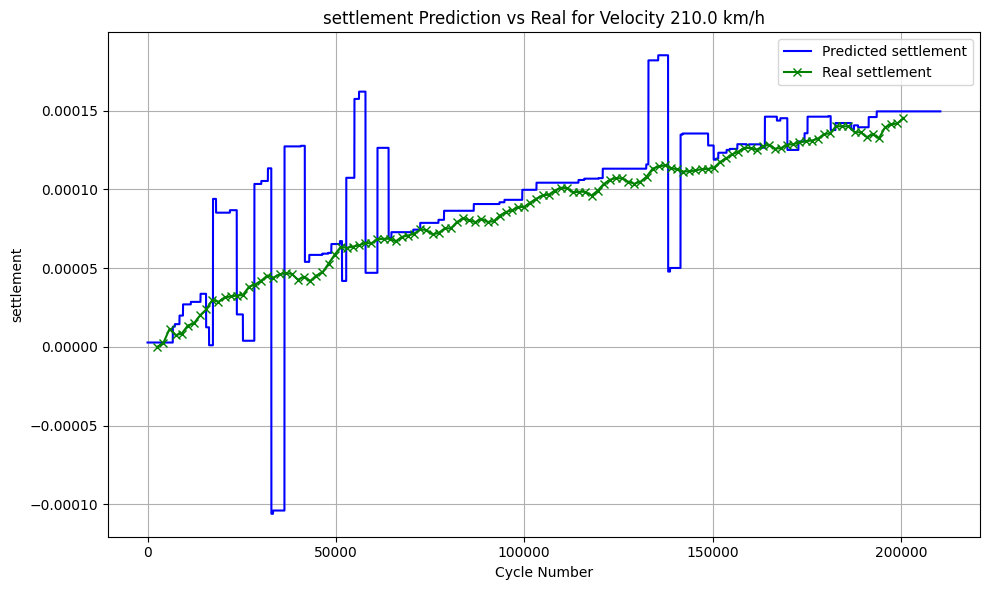

In [288]:
import matplotlib.pyplot as plt

def generate_and_plot_settlement(model, ground_truth_df, start_cycle, end_cycle, step_size, velocity):
    # Generate cycle numbers for the prediction
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers
    })

    # Predict settlement
    predicted_settlement = model.predict(new_data)

    # Filter ground truth data for the specified cycle range and velocity
    ground_truth_filtered = ground_truth_df[
        (ground_truth_df['Cycle_Number'].between(start_cycle, end_cycle)) &
        (ground_truth_df['velocity'] == velocity)
    ]
    
    # Plot predicted settlement
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_settlement, label='Predicted settlement', color='blue', marker='')
    
    # Plot real settlement (ground truth)
    plt.plot(ground_truth_filtered['Cycle_Number'], ground_truth_filtered['Smoothed_Difference'], 
             label='Real settlement', color='green', marker='x')
    
    # Plot settings
    plt.xlabel('Cycle Number')
    plt.ylabel('settlement')
    plt.title(f'settlement Prediction vs Real for Velocity {velocity} km/h')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage of the function
generate_and_plot_settlement(best_model_lgb, combined_df[combined_df['position'] == 1],
                             start_cycle=0, end_cycle=210473, step_size=1,
                             velocity=210.0)


In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Multivariable Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'SVM': SVR()
}

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse = mean_squared_error(y_test, y_test_pred)
std_dev = np.std(y_test_pred)
r2 = r2_score(y_test, y_test_pred)


results = {
    'Algorithm': ['Random Forest (optimized)'],
    'R2': [r2],  
    'σ': [std_dev],
    'RMSE': [rmse],
    'MAE': [mae],
    'MSE': [mse]
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)  # R2 score
    std_dev = np.std(y_pred)
    
    # Store the results
    results['Algorithm'].append(name)
    results['R2'].append(r2)
    results['σ'].append(std_dev)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)
    results['MSE'].append(mse)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set display options to show numbers in standard decimal format
pd.options.display.float_format = '{:.4f}'.format

# Display the results DataFrame
results_df



,Algorithm,R2,σ,RMSE,MAE,MSE
0,Random Forest (optimized),0.5327,0.0016,0.0016,0.0006,0.0000
1,Multivariable Regression,0.2168,0.0010,0.0020,0.0013,0.0000
2,Decision Tree,-0.1013,0.0020,0.0024,0.0008,0.0000
3,Neural Network,-2596538.3989,3.6050,3.7018,2.2383,13.7035
4,SVM,-1.6481,0.0000,0.0037,0.0037,0.0000


combined_df

In [103]:
experiment_tables[3]

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,smoothed_displacement,Difference
1190,18/02/2005 14:43:01,300.828,0,1972,1,15,1,1,160.0,4.116579,...,0.001906,0.001926,0.001936,0.001886,0.001926,NaN,3,Right,0.001910,0.000000
1191,18/02/2005 14:48:02,601.562,0,3211,1,15,1,1,160.0,4.116579,...,0.001946,0.001995,0.001946,0.001985,0.001975,NaN,3,Right,0.001965,0.000056
1192,18/02/2005 14:53:02,902.234,0,4449,1,15,1,1,160.0,4.116579,...,0.001985,0.001995,0.002015,0.001975,0.002005,NaN,3,Right,0.001987,0.000078
1193,18/02/2005 14:58:03,1202.812,0,5687,1,15,1,1,160.0,4.116579,...,0.001995,0.002015,0.001956,0.002025,0.001965,NaN,3,Right,0.001997,0.000088
1194,18/02/2005 15:03:03,1503.046,0,6921,1,15,1,1,160.0,4.116579,...,0.002025,0.001995,0.002005,0.002015,0.001965,NaN,3,Right,0.002009,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,24/02/2005 17:58:06,18028.797,0,186154,1,14,1,1,400.0,10.291450,...,0.016168,0.016197,0.016207,0.016187,0.016187,NaN,3,Left,0.016233,0.011742
2374,24/02/2005 18:03:07,18329.656,0,189249,1,14,1,1,400.0,10.291450,...,0.016197,0.016187,0.016197,0.016197,0.016197,NaN,3,Left,0.016227,0.011736
2375,24/02/2005 18:08:08,18630.062,0,192343,1,14,1,1,400.0,10.291450,...,0.016138,0.016207,0.016237,0.016217,0.016207,NaN,3,Left,0.016229,0.011738
2376,24/02/2005 18:13:08,18930.125,0,195427,1,14,1,1,400.0,10.291450,...,0.016177,0.016168,0.016138,0.016197,0.016227,NaN,3,Left,0.016252,0.011762


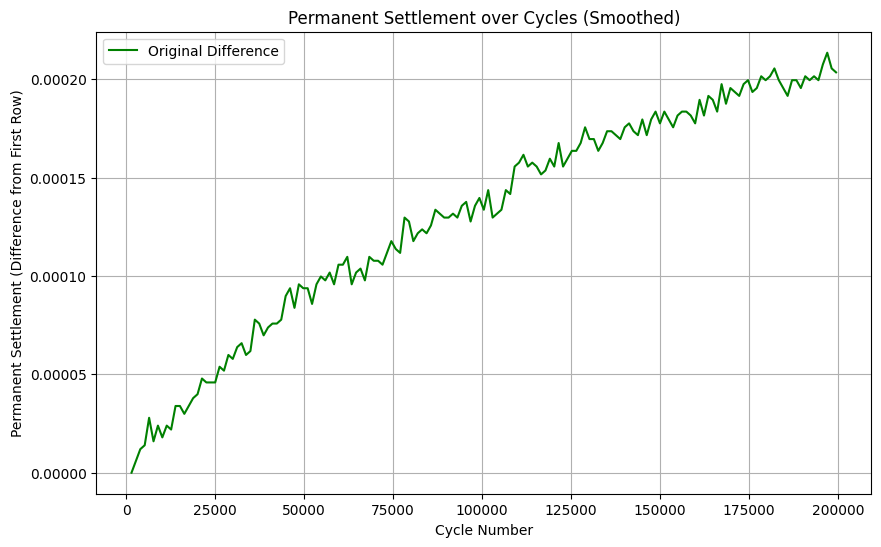

In [96]:
df = final_df[(final_df['velocity'] == 160) & (final_df['experiment_number'] == 2) & (final_df['position'] == 'Right')]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['Difference'], marker='', label='Original Difference', color='green')
plt.xlabel("Cycle Number")
plt.ylabel("Permanent Settlement (Difference from First Row)")
plt.title("Permanent Settlement over Cycles (Smoothed)")
plt.legend()
plt.grid()
plt.show()

# ML